In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](CRISP_DM.png)

# Data Preparation


* focus is always to understand the final data structure
* support each step by visual analytics

# Johns Hopkins GITHUB csv data

In [2]:
data_path='/Users/anweshapanda/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ]

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

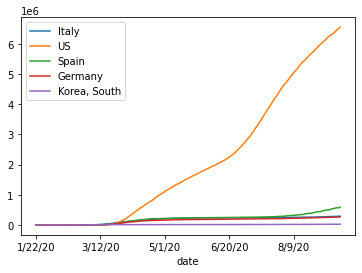

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:

time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [15]:
df_plot.to_csv('/Users/anweshapanda/ads_covid-19/data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [16]:
data_path='/Users/anweshapanda/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  #ensure a sring, important for indexing

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,no,Albania,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,no,Algeria,0,0,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,no,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,no,Angola,0,0,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [20]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [23]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('/Users/anweshapanda/ads_covid-19/data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [24]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
61964 2020-09-10    no      US    6396100
62230 2020-09-11    no      US    6443652
62496 2020-09-12    no      US    6485123
62762 2020-09-13    no      US    6519573
63028 2020-09-14    no      US    6553652


# Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [25]:
data_path='/Users/anweshapanda/ads_covid-19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1371,1377,1383,1385,1398,1413,1420,1432,1442,1447
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4542,4569,4586,4609,4639,4678,4722,4752,4781,4800
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,616,616,617,617,618,618,618,620,622,626
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,550,555,557,562,564,566,574,576,578,581
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1062,1065,1070,1071,1082,1099,1109,1114,1121,1128


In [26]:
# drop all non relevant fields! 
# Many of this fields do not belong to 
# a transactional data. These fields belong to so called master data
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()

In [27]:
## the stack command has problems when only one information is available within a stacking level
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


# update the large relational file

In [28]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [29]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [30]:
pd_relational_model_all.to_csv('/Users/anweshapanda/ads_covid-19/data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [31]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

             date    state country  confirmed
62805  2020-01-22  Alabama      US          0
62806  2020-01-22  Alabama      US          0
62807  2020-01-22  Alabama      US          0
62808  2020-01-22  Alabama      US          0
62809  2020-01-22  Alabama      US          0
...           ...      ...     ...        ...
854380 2020-09-14  Wyoming      US        476
854381 2020-09-14  Wyoming      US        312
854382 2020-09-14  Wyoming      US          2
854383 2020-09-14  Wyoming      US        111
854384 2020-09-14  Wyoming      US         23

[791580 rows x 4 columns]


# cross check on full sum US data

In [32]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [33]:
check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5


# Group-by apply

In [34]:
pd_JH_data=pd.read_csv('/Users/anweshapanda/ads_covid-19/data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
pd_JH_data=pd_JH_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
pd_JH_data.head()

,date,state,country,confirmed
0,2020-01-22,Alberta,Canada,0
1,2020-01-22,no,"Korea, South",1
2,2020-01-22,no,Kosovo,0
3,2020-01-22,no,Kuwait,0
4,2020-01-22,no,Kyrgyzstan,0


# Test data

In [35]:
test_data=pd_JH_data[((pd_JH_data['country']=='US')|
                      (pd_JH_data['country']=='Germany'))&
                     (pd_JH_data['date']>'2020-03-20')]

In [36]:
test_data

,date,state,country,confirmed
15736,2020-03-21,no,Germany,22213
15777,2020-03-21,no,US,24508
16002,2020-03-22,no,Germany,24873
16042,2020-03-22,no,US,33152
16269,2020-03-23,no,Germany,29056
16309,2020-03-23,no,US,43850
16535,2020-03-24,no,Germany,32986
16575,2020-03-24,no,US,54112
16801,2020-03-25,no,Germany,37323
16840,2020-03-25,no,US,66055


In [37]:
test_data.groupby(['country']).agg(np.max)

,date,state,confirmed
country,,,
Germany,2020-09-14,no,263222
US,2020-09-14,no,6553652


In [38]:
# %load ../src/features/build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)

def get_doubling_time_via_regression(in_array):
    ''' Use a linear regression to approximate the doubling rate'''

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope

In [39]:
test_data.groupby(['state','country']).agg(np.max)

date  confirmed
state country                      
no    Germany 2020-09-14     263222
      US      2020-09-14    6553652

In [40]:
# this command will only work when adapting the get_doubling_time_via_regression function

# test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [41]:
def rolling_reg(df_input,col='confirmed'):
    ''' input has to be a data frame'''
    ''' return is single series (mandatory for group by apply)'''
    days_back=3
    result=df_input[col].rolling(
                window=days_back,
                min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return result

In [42]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country       
no     Germany  15736            NaN
                16002            NaN
                16269       7.417994
                16535       7.142035
                16801       8.012983
                17067       6.954407
                17333       6.501919
                17599       7.390371
                17865      10.136671
                18130      13.541893
                18397      13.781393
                18663      13.140681
                18928      12.037271
                19196      12.735506
                19461      16.052694
                19726      21.372453
                19992      27.427355
                20258      27.511936
                20524      21.792179
                20790      21.495848
                21057      26.565108
                21322      36.198404
                21588      43.982990
                21854      49.423444
                22121      74.043747
                22385      56.424411
                

In [43]:
pd_DR_result=pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [44]:
pd_DR_result=pd_DR_result.rename(columns={'confirmed':'confirmed_DR',
                             'level_2':'index'})
pd_DR_result.head()

,state,country,index,confirmed_DR
0,Alberta,Canada,0,NaN
1,Alberta,Canada,465,NaN
2,Alberta,Canada,701,NaN
3,Alberta,Canada,966,NaN
4,Alberta,Canada,1263,NaN


In [45]:
pd_JH_data=pd_JH_data.reset_index()
pd_JH_data.head()

,index,date,state,country,confirmed
0,0,2020-01-22,Alberta,Canada,0
1,1,2020-01-22,no,"Korea, South",1
2,2,2020-01-22,no,Kosovo,0
3,3,2020-01-22,no,Kuwait,0
4,4,2020-01-22,no,Kyrgyzstan,0


In [46]:
pd_result_larg=pd.merge(pd_JH_data,pd_DR_result[['index','confirmed_DR']],on=['index'],how='left')
pd_result_larg.head()

,index,date,state,country,confirmed,confirmed_DR
0,0,2020-01-22,Alberta,Canada,0,NaN
1,1,2020-01-22,no,"Korea, South",1,NaN
2,2,2020-01-22,no,Kosovo,0,NaN
3,3,2020-01-22,no,Kuwait,0,NaN
4,4,2020-01-22,no,Kyrgyzstan,0,NaN


In [47]:
# pd_result_larg[pd_result_larg['country']=='Germany']